In [7]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(
    {
        'font.size': 14, 
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'axes.titlesize': 22, 
        'axes.titleweight': 'normal'
    }
)

In [8]:
def read_dataframes(file_pattern):
    return pd.concat([pd.read_csv(file) for file in glob.glob(file_pattern)], sort=False)

In [9]:
output_dir = 'config1'
dir_path = 'outputs/' + output_dir +'/'

df = read_dataframes(f'{dir_path}*.csv')
df[['Model class', 'Model', 'Extra model']] = pd.DataFrame(df.Name.str.split('-').values.tolist())
df['Model'] = df['Model'].replace({'CostSensitiveLogisticRegression': 'CS Logistic Regression',
                                  'CostSensitiveDecisionTreeClassifier': 'CS Decistion Tree'})
df['Extra model'] = df['Extra model'].fillna('Standard')

In [10]:
df.head()

,Accuracy,Cost,F1,Name,Precision,Recall,Savings,Model class,Model,Extra model
0,0.999214,12851.51,0.736842,CI-LogisticRegression,0.875000,0.636364,0.467914,CI,LogisticRegression,Standard
1,0.998952,12528.62,0.691358,CI-DecisionTree,0.704403,0.678788,0.481283,CI,DecisionTree,Standard
2,0.999392,9937.27,0.804054,CI-RandomForest,0.908397,0.721212,0.588571,CI,RandomForest,Standard
3,0.999392,9804.84,0.810458,CI-XGBoost,0.879433,0.751515,0.594054,CI,XGBoost,Standard
4,0.650680,30745.91,0.004540,CST-CostSensitiveLogisticRegression,0.002281,0.460606,-0.272960,CST,CS Logistic Regression,Standard


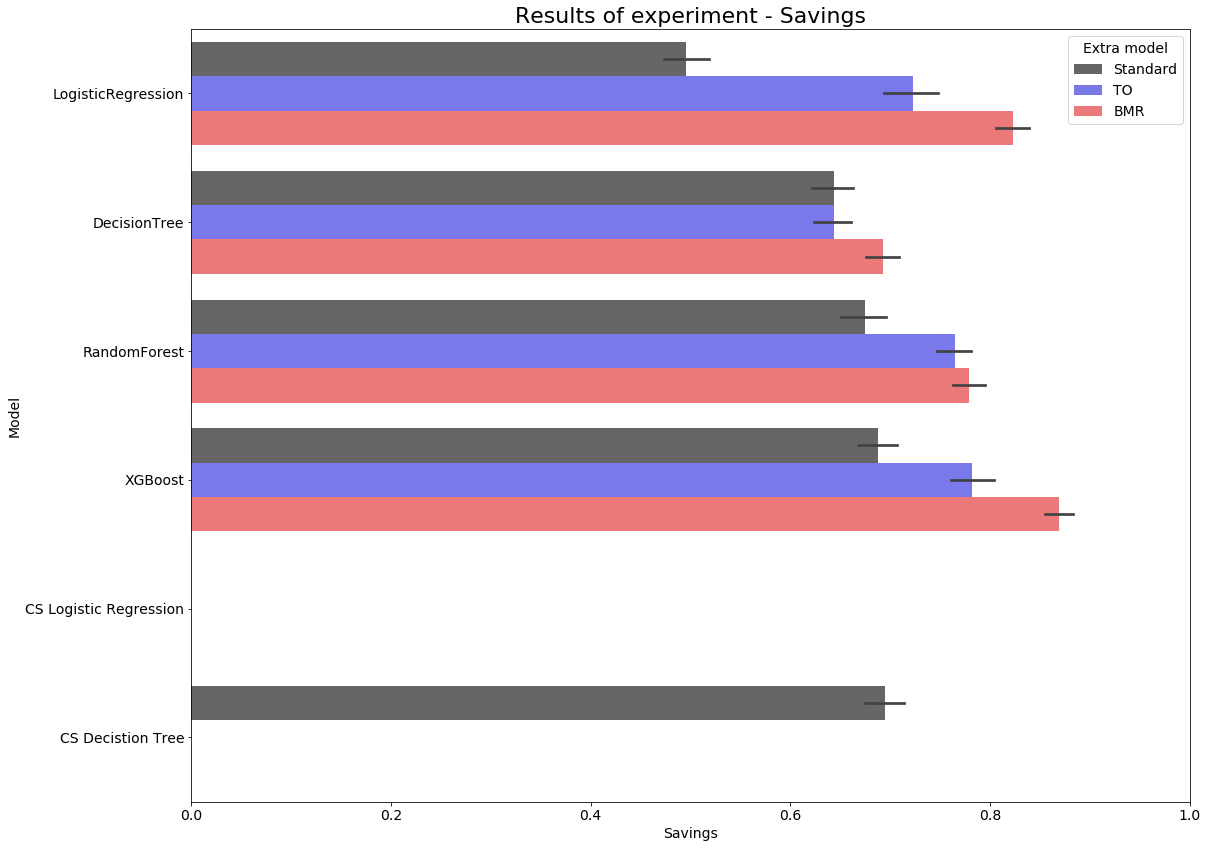

In [11]:
data = df
color_mapping = {'Standard': 'k', 'BMR': 'r', 'TO': 'b'}
hue_order = ['Standard', 'TO', 'BMR']

fig, ax = plt.subplots(figsize = (17, 12))

sns.barplot(x = 'Savings', y = 'Model', data = data, hue = 'Extra model', 
            ax = ax, alpha = 0.6, palette = color_mapping, hue_order = hue_order)

ax.set_xlim([0, 1])
plt.title('Results of experiment - Savings')
plt.tight_layout()
plt.savefig('Config1-Savings.png')

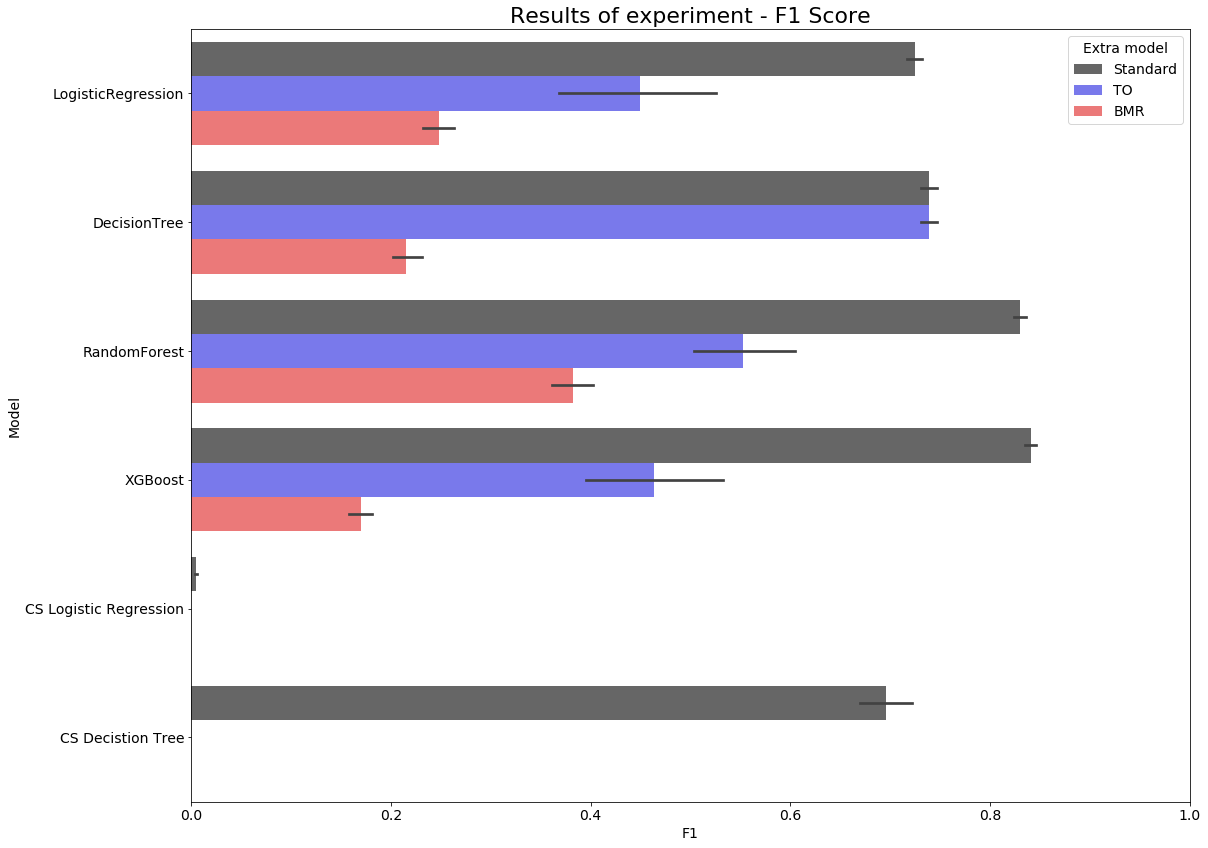

In [12]:
data = df
color_mapping = {'Standard': 'k', 'BMR': 'r', 'TO': 'b'}
hue_order = ['Standard', 'TO', 'BMR']

fig, ax = plt.subplots(figsize = (17, 12))

sns.barplot(x = 'F1', y = 'Model', data = data, hue = 'Extra model', 
            ax = ax, alpha = 0.6, palette = color_mapping, hue_order = hue_order)

ax.set_xlim([0, 1])
plt.title('Results of experiment - F1 Score')
plt.tight_layout()
plt.savefig('Config1-F1.png')